In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Read the data

In [2]:
dbr=pd.read_csv("imdb_dbr.csv")

In [3]:
dbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546931 entries, 0 to 546930
Data columns (total 20 columns):
Unnamed: 0            546931 non-null int64
Unnamed: 0.1          546931 non-null int64
Unnamed: 0.1.1        546931 non-null int64
Unnamed: 0.1.1.1      546931 non-null int64
Unnamed: 0.1.1.1.1    546931 non-null int64
tconst                546931 non-null object
ordering              546931 non-null int64
nconst                546931 non-null object
category              546931 non-null object
characters            546931 non-null object
primaryTitle          546931 non-null object
startYear             546931 non-null int64
genres                546931 non-null object
region                546929 non-null object
primaryName           546931 non-null object
birthYear             546931 non-null int64
primaryProfession     546931 non-null object
age                   546931 non-null int64
averageRating         391003 non-null float64
numVotes              391003 non-null floa

In [4]:
dbr.region.value_counts()[0:10]

US     87480
IN     39492
XWW    27793
BR     23747
FR     21360
GB     20977
TR     19798
JP     18745
MX     18520
IT     16879
Name: region, dtype: int64

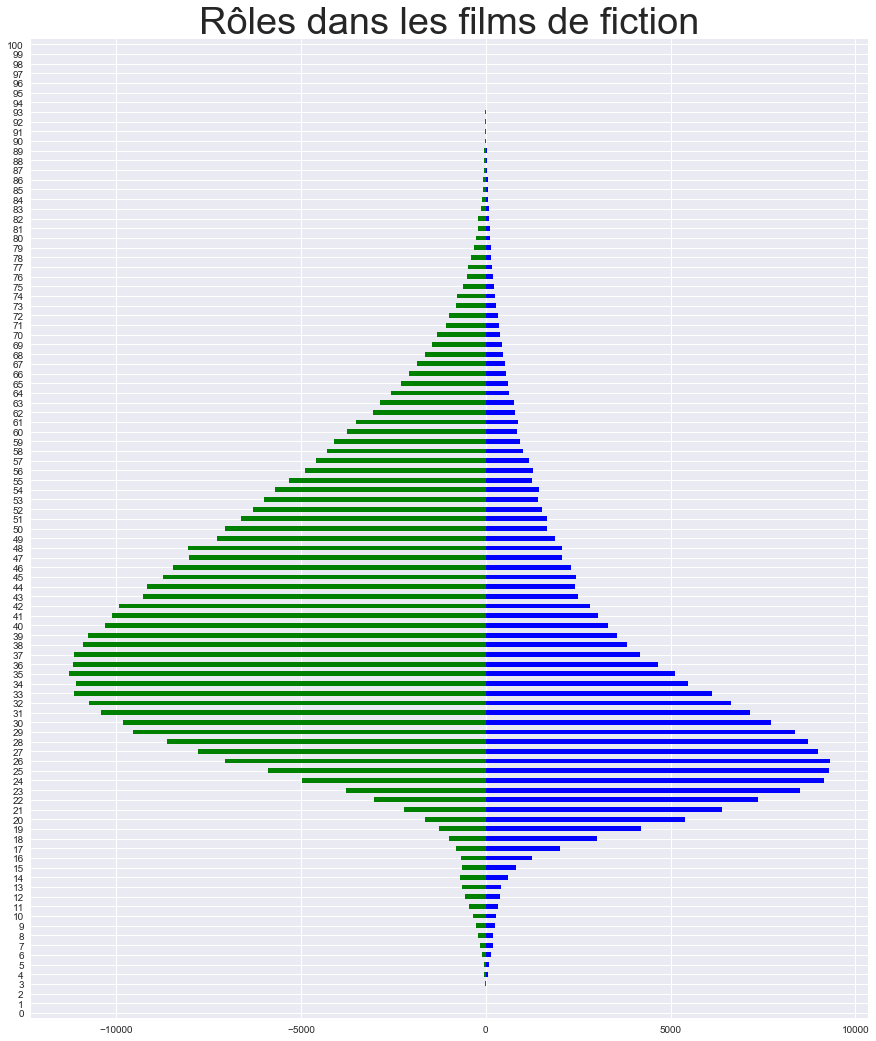

In [5]:
dbf=dbr[dbr['category'].str.contains('actress')]
dbh=dbr[dbr['category'].str.contains('actor')]
plt.figure(figsize=(15,18))
axes = plt.gca()
axes.set_title('Rôles dans les films de fiction', fontsize=38)
f=dbf['age'].value_counts(sort=False,ascending=True)
# initialement j'avais négligé de procéder à cette réindexation et mon décompte oubliait les ages sans roles
f=f.reindex(range(101), fill_value = 0)
h=-dbh['age'].value_counts(sort=False,ascending=True)
h=h.reindex(range(101), fill_value = 0)
h=h.sort_index()
f=f.sort_index()
h.plot(kind='barh',color='green')
f.plot(kind='barh',color='blue')

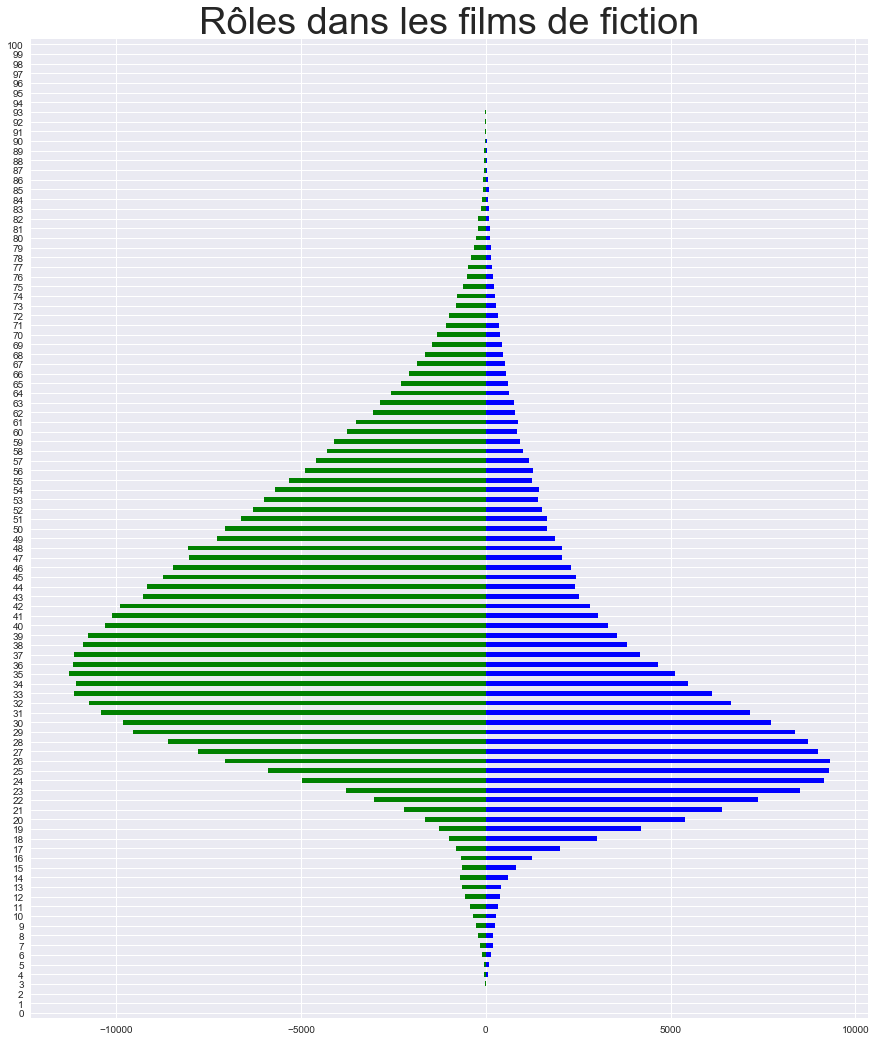

In [6]:
dbf=dbr[dbr['primaryProfession'].str.contains('actress')]
dbh=dbr[dbr['primaryProfession'].str.contains('actor')]
plt.figure(figsize=(15,18))
axes = plt.gca()
axes.set_title('Rôles dans les films de fiction', fontsize=38)
f=dbf['age'].value_counts(sort=False,ascending=True)
f=f.reindex(range(101), fill_value = 0)
h=-dbh['age'].value_counts(sort=False,ascending=True)
h=h.reindex(range(101), fill_value = 0)
h=h.sort_index()
f=f.sort_index()
h.plot(kind='barh',color='green')
f.plot(kind='barh',color='blue')

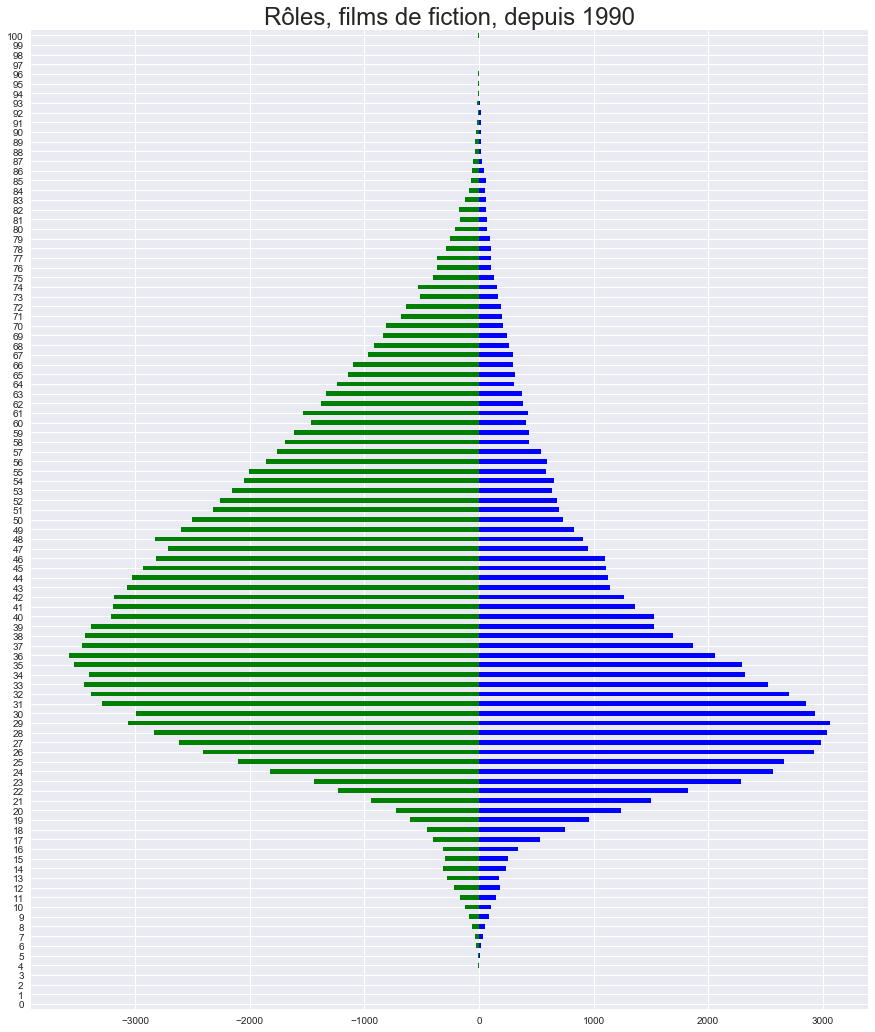

In [7]:
dbr1=dbr[dbr.startYear>1989]
dbf=dbr1[dbr1['primaryProfession'].str.contains('actress')]
dbh=dbr1[dbr1['primaryProfession'].str.contains('actor')]
plt.figure(figsize=(15,18))
axes = plt.gca()
axes.set_title('Rôles, films de fiction, depuis 1990', fontsize=24)
#axes.set_xlim([-300,300])
f=dbf['age'].value_counts(sort=False,ascending=True)
h=-dbh['age'].value_counts(sort=False,ascending=True)
f=f.sort_index()
h=h.sort_index()
f=f.reindex(range(101), fill_value = 0)
h=h.reindex(range(101), fill_value = 0)
f.plot(kind='barh',color='blue')
h.plot(kind='barh',color='green')

In [8]:
f.describe()

count     101.000000
mean      727.089109
std       911.181575
min         0.000000
25%        58.000000
50%       300.000000
75%      1106.000000
max      3061.000000
Name: age, dtype: float64

In [9]:
h=-h
h.describe()

count     101.000000
mean     1228.554455
std      1238.843101
min         0.000000
25%        85.000000
50%       719.000000
75%      2319.000000
max      3577.000000
Name: age, dtype: float64

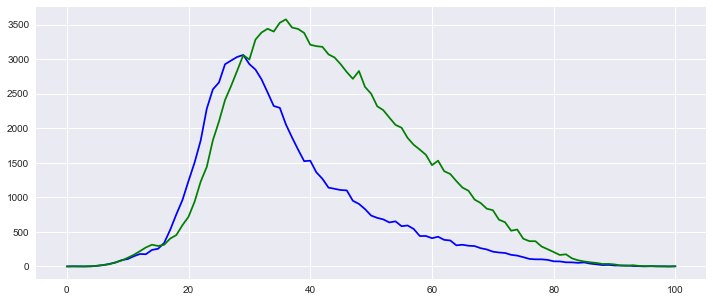

In [10]:
plt.figure(figsize=(12,5))
f.plot(color='blue')
h.plot(color='green')

In [11]:
nf=f.sum()
nh=h.sum()
print('Sur cet échantillon, nous observons {} rôles d\'actrices et {} rôles d\'acteurs.'.format(nf,nh))
print('Nous avons donc {:.0%} de rôles féminins et {:.0%} de rôles masculins.'.format(nf/(nf+nh),nh/(nf+nh)))
print('La proportion est de 10 actrices principales pour {:.0f} acteurs principaux.'.format(10*nh/nf))

Sur cet échantillon, nous observons 73436 rôles d'actrices et 124084 rôles d'acteurs.
Nous avons donc 37% de rôles féminins et 63% de rôles masculins.
La proportion est de 10 actrices principales pour 17 acteurs principaux.


In [12]:
def grafact(dbr, regio='US', start=1919, end=2019):
    dbr1=dbr[dbr.region==regio]
    dbr1=dbr1[dbr1.startYear>start]
    dbr1=dbr1[dbr1.startYear<end]
    dbf=dbr1[dbr1['primaryProfession'].str.contains('actress')]
    dbh=dbr1[dbr1['primaryProfession'].str.contains('actor')]
    #plt.figure(figsize=(15,18))
    #axes = plt.gca()
    f=dbf['age'].value_counts(sort=False,ascending=True)
    h=dbh['age'].value_counts(sort=False,ascending=True)
    f=f.sort_index()
    h=h.sort_index()
    f=f.reindex(range(101), fill_value = 0)
    h=h.reindex(range(101), fill_value = 0)
    plt.close()
    tot=h.sum()+f.sum()
    print('Dans la région',regio,'de',start,'à',end,'le ratio rôles masculins sur rôles feminins est de {:.1f} au total'.format(h.sum()/f.sum()))
    print('Il est de {:.1f} chez les moins de 30 ans'.format(h[0:30].sum()/f[0:30].sum()))
    print('de {:.1f} chez les 30 à 50 ans'.format(h[30:50].sum()/f[30:50].sum()))
    print('et de {:.1f} chez les + de 50 ans'.format(h[50:].sum()/f[50:].sum()))
    print('Sur 100 rôles, {:.0f} concernaient des hommes de moins de 30 ans, {:.0f} des hommes de 30 à 50 ans,'.format(100*h[0:30].sum()/tot,100*h[30:50].sum()/tot))
    print('et {:.0f} des hommes de + de 50 ans'.format(100*h[50:].sum()/tot))
    print('{:.0f} concernaient des femmes de moins de 30 ans, {:.0f} des femmes de 30 à 50 ans,'.format(100*f[0:30].sum()/tot,100*f[30:50].sum()/tot))
    print('et {:.0f} des femmes de + de 50 ans'.format(100*f[50:].sum()/tot))
    print('f-15',f[:15].sum(),'f15-29',f[15:30].sum(),'f30-39',f[30:40].sum(),'f40-49',f[40:50].sum(),'f50-59',f[50:60].sum(),'f60+',f[60:].sum())
    print('h-15',h[:15].sum(),'h15-29',h[15:30].sum(),'h30-39',h[30:40].sum(),'h40-49',h[40:50].sum(),'h50-59',h[50:60].sum(),'h60+',h[60:].sum())
       
    if regio=='US':
        regtit='USA'
    elif regio=='FR':
        regtit='France'
    elif regio=='IN':
        regtit='Inde'
    elif regio=='GB':
        regtit='Grande-Bretagne'
    elif regio=='JP':
        regtit='Japon'
    elif regio=='BR':
        regtit='Brésil'
    else :
        regtit=regio  
    
    plt.figure(figsize=(15,18))
    axes = plt.gca()
    axes.set_title('Age des rôles de fiction, '+regtit+', depuis '+str(start), fontsize=38)
    
    
    h=-h
    f.plot(kind='barh',color='blue')
    h.plot(kind='barh',color='green')

    plt.figure(figsize=(12,5))
    h=-h
    f.plot(color='blue')
    h.plot(color='green')
    
    f.to_excel('f_'+regio+'_'+str(start)+'_'+str(end)+'.xlsx')
    h.to_excel('h_'+regio+'_'+str(start)+'_'+str(end)+'.xlsx')
    
    
    
    

Dans la région US de 1919 à 2019 le ratio rôles masculins sur rôles feminins est de 1.9 au total
Il est de 0.8 chez les moins de 30 ans
de 2.6 chez les 30 à 50 ans
et de 3.8 chez les + de 50 ans
Sur 100 rôles, 13 concernaient des hommes de moins de 30 ans, 36 des hommes de 30 à 50 ans,
et 16 des hommes de + de 50 ans
17 concernaient des femmes de moins de 30 ans, 14 des femmes de 30 à 50 ans,
et 4 des femmes de + de 50 ans
f-15 425 f15-29 11543 f30-39 7083 f40-49 2837 f50-59 1717 f60+ 1337
h-15 594 h15-29 8508 h30-39 14544 h40-49 11198 h50-59 6907 h60+ 4843


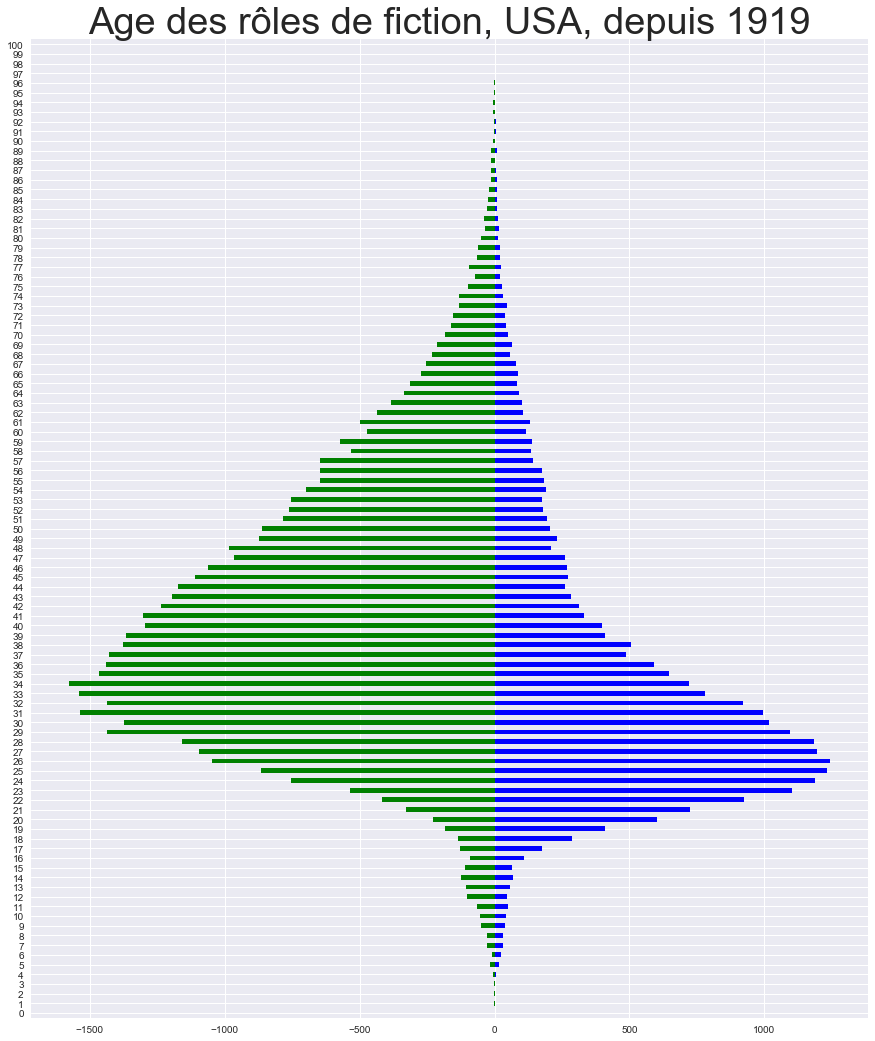

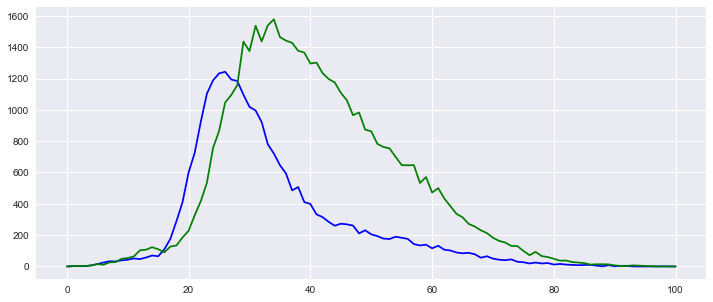

In [13]:
grafact(dbr)

Dans la région US de 1990 à 2019 le ratio rôles masculins sur rôles feminins est de 1.8 au total
Il est de 1.1 chez les moins de 30 ans
de 1.8 chez les 30 à 50 ans
et de 3.1 chez les + de 50 ans
Sur 100 rôles, 14 concernaient des hommes de moins de 30 ans, 31 des hommes de 30 à 50 ans,
et 18 des hommes de + de 50 ans
13 concernaient des femmes de moins de 30 ans, 17 des femmes de 30 à 50 ans,
et 6 des femmes de + de 50 ans
f-15 199 f15-29 4199 f30-39 3997 f40-49 1751 f50-59 1028 f60+ 915
h-15 212 h15-29 4419 h30-39 6072 h40-49 4387 h50-59 3070 h60+ 3021


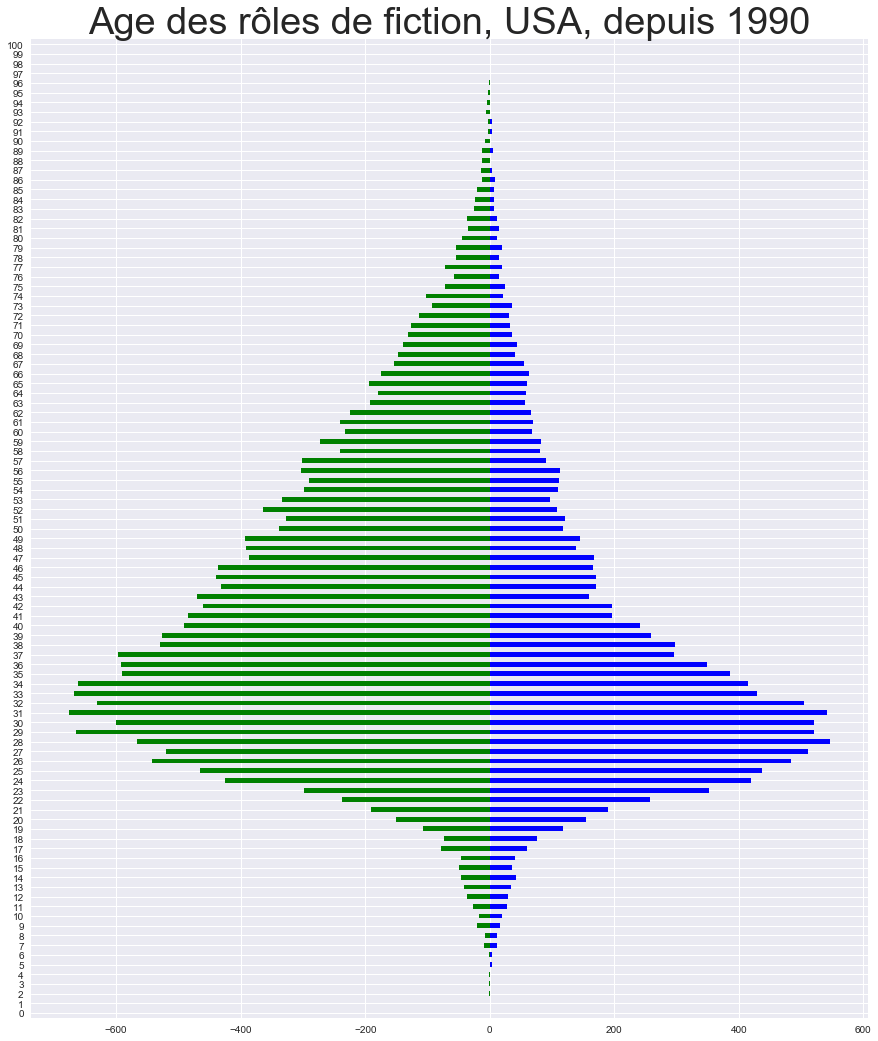

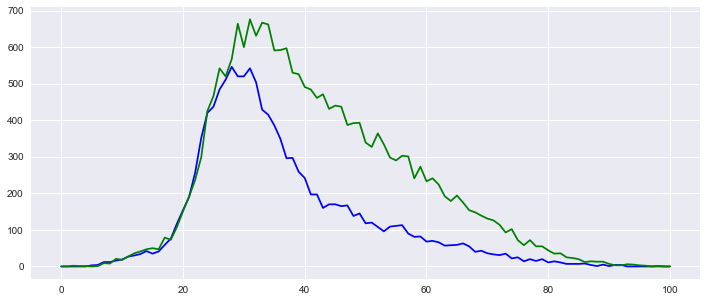

In [14]:
grafact(dbr,start=1990)

Dans la région GB de 1990 à 2019 le ratio rôles masculins sur rôles feminins est de 1.9 au total
Il est de 1.2 chez les moins de 30 ans
de 2.0 chez les 30 à 50 ans
et de 3.3 chez les + de 50 ans
Sur 100 rôles, 14 concernaient des hommes de moins de 30 ans, 32 des hommes de 30 à 50 ans,
et 21 des hommes de + de 50 ans
12 concernaient des femmes de moins de 30 ans, 16 des femmes de 30 à 50 ans,
et 6 des femmes de + de 50 ans
f-15 14 f15-29 547 f30-39 533 f40-49 228 f50-59 146 f60+ 150
h-15 16 h15-29 639 h30-39 874 h40-49 632 h50-59 528 h60+ 453


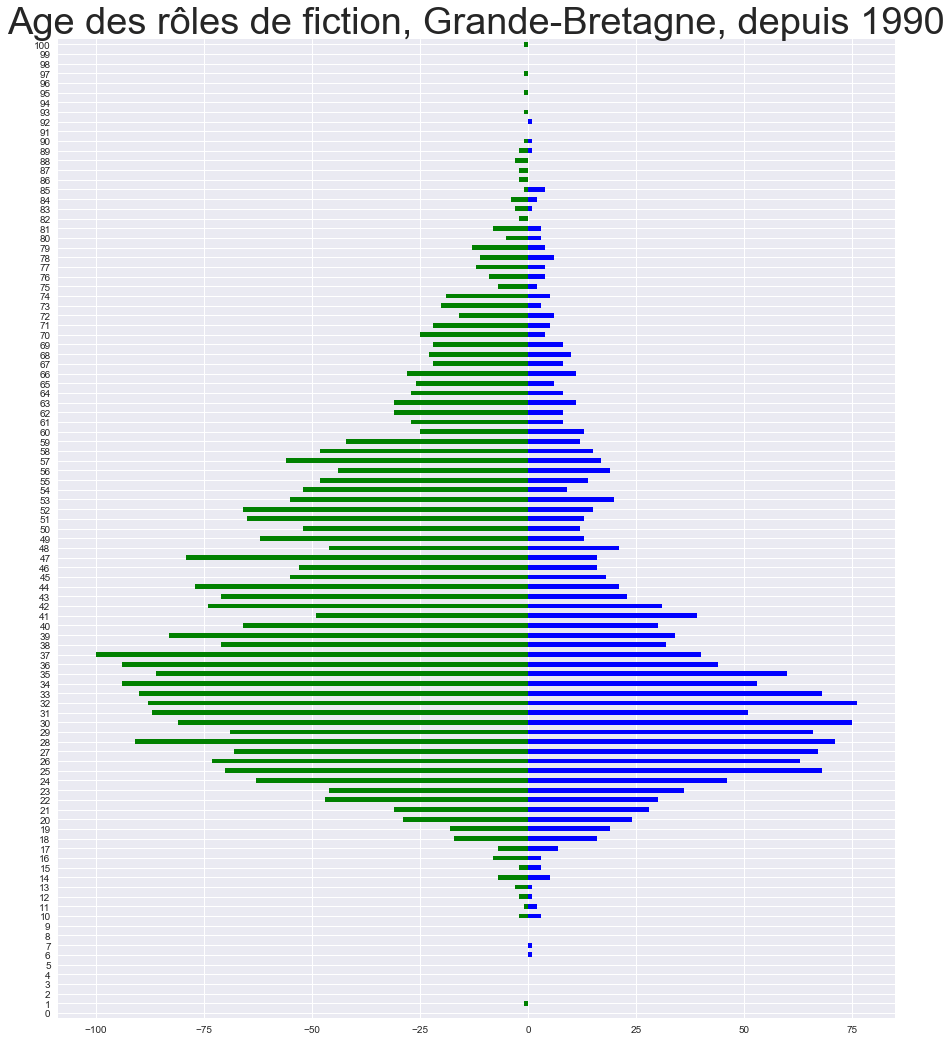

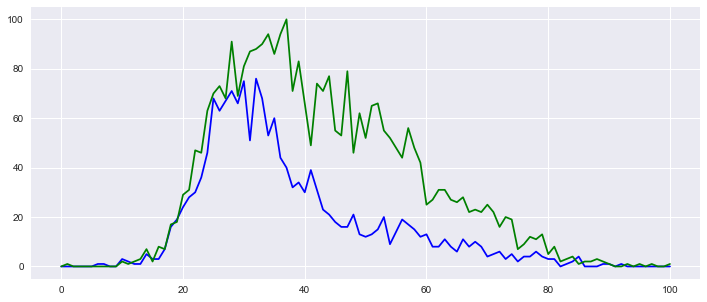

In [15]:
grafact(dbr,start=1990,regio='GB')

Dans la région GB de 2000 à 2019 le ratio rôles masculins sur rôles feminins est de 1.9 au total
Il est de 1.1 chez les moins de 30 ans
de 2.0 chez les 30 à 50 ans
et de 3.2 chez les + de 50 ans
Sur 100 rôles, 13 concernaient des hommes de moins de 30 ans, 31 des hommes de 30 à 50 ans,
et 21 des hommes de + de 50 ans
12 concernaient des femmes de moins de 30 ans, 16 des femmes de 30 à 50 ans,
et 7 des femmes de + de 50 ans
f-15 9 f15-29 480 f30-39 470 f40-49 207 f50-59 134 f60+ 142
h-15 11 h15-29 551 h30-39 763 h40-49 568 h50-59 479 h60+ 414


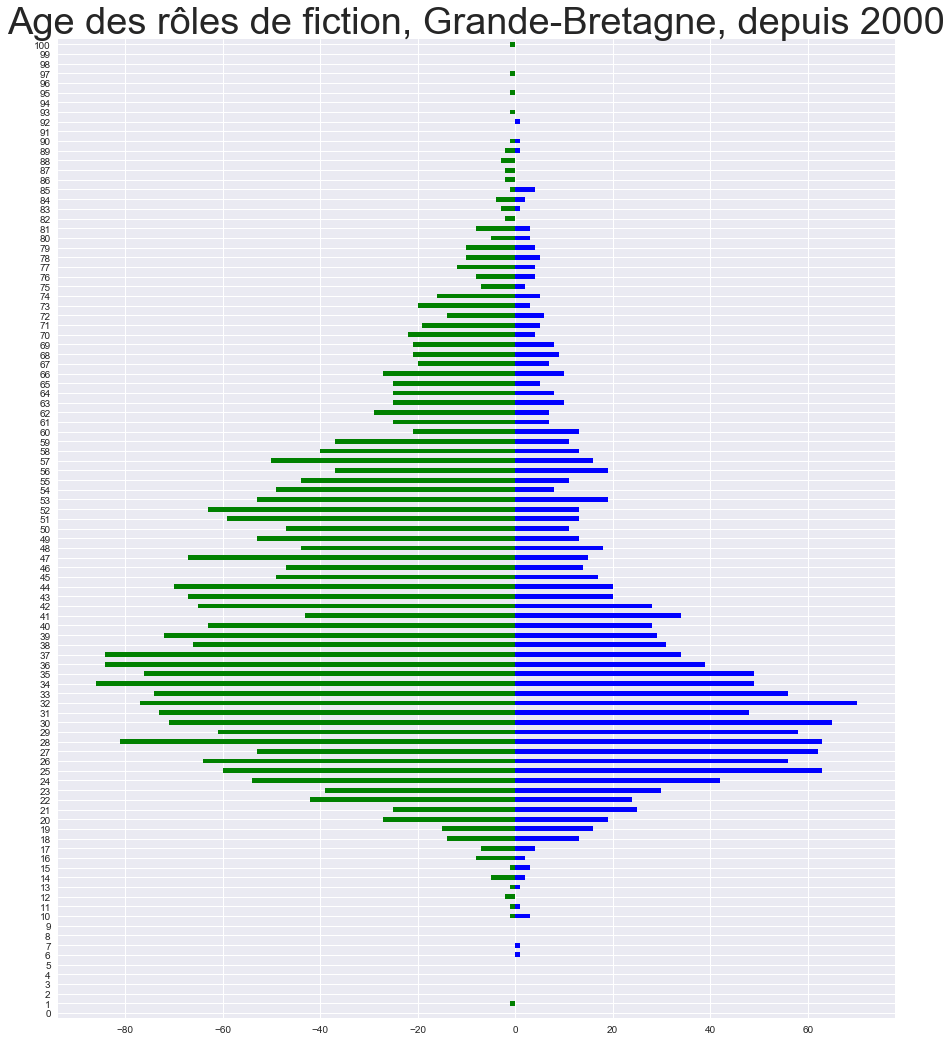

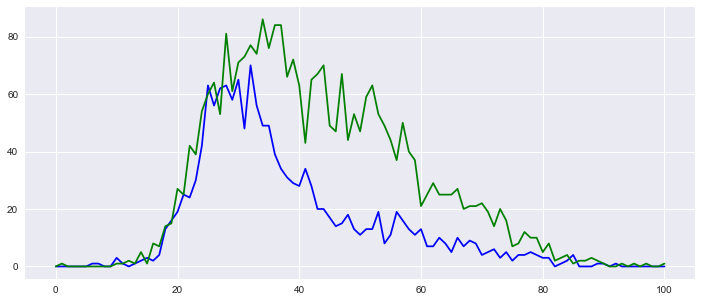

In [26]:
grafact(dbr,start=2000,regio='GB')

In [17]:
dbf=dbr[dbr['primaryProfession'].str.contains('actress')]
dbh=dbr[dbr['primaryProfession'].str.contains('actor')]

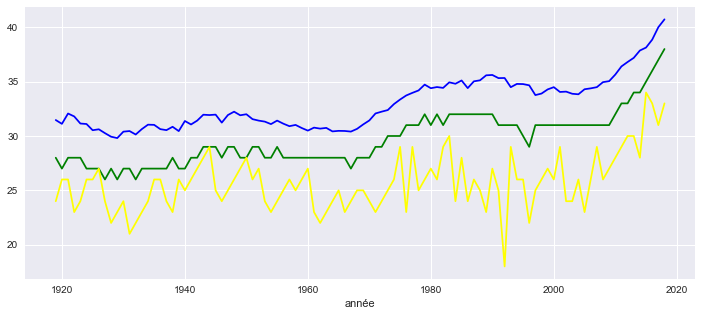

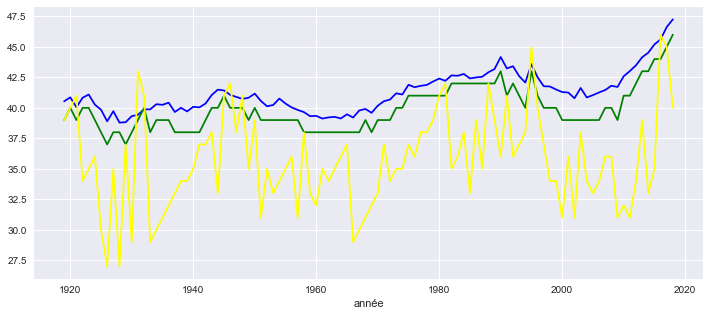

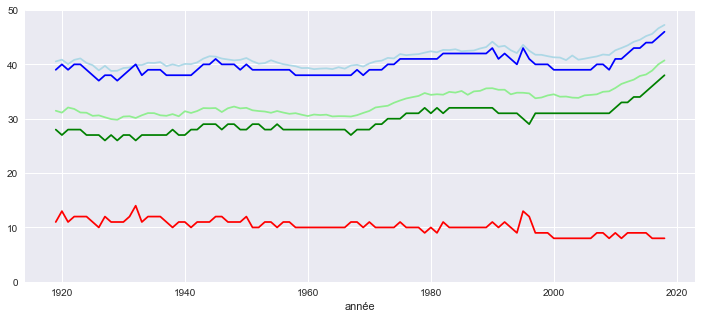

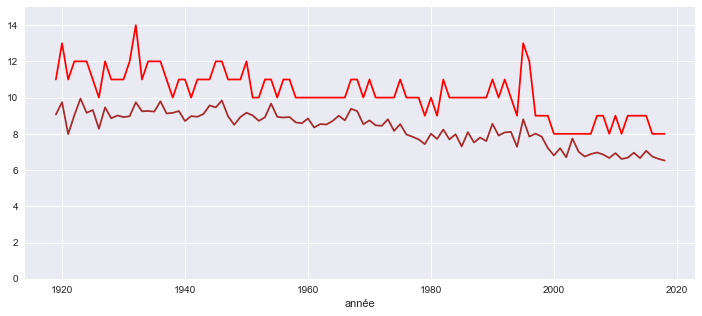

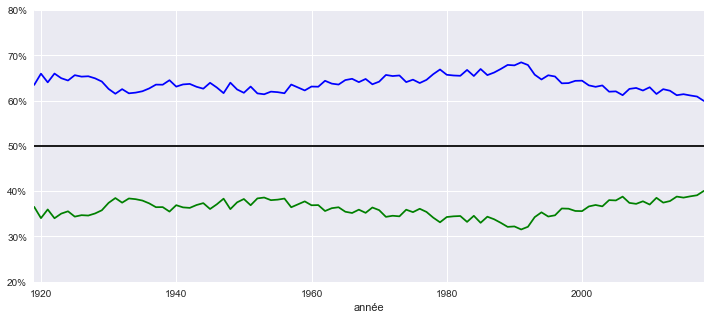

In [18]:
#avant d'avoir connaissance de la possibilité de faire un reindexing
#j'étais passé par un dictionnaire pour éviter d'oublier des ages 
dict0={}
dict1={}
for i in range(101):
    dict0[i]=0
    dict1[i]=0

jf=dbf[dbf.startYear == 1919]
jf=jf['age'].value_counts(ascending=True)
dict0.update(dict(jf))
db=pd.Series(dict0,name=1919)
for i in range(1,100):
    jf=dbf[dbf.startYear == 1919+i]
    jf=jf['age'].value_counts(ascending=True)
    dict0.update(dict(jf))
    db=pd.concat([db,pd.Series(dict0,name=1919+i)],axis=1)
    
    
jh=dbh[dbh.startYear == 1919]
jh=jh['age'].value_counts(ascending=True)
dict1.update(dict(jh))
dh=pd.Series(dict1,name=1919)
for i in range(1,100):
    jh=dbh[dbh.startYear == 1919+i]
    jh=jh['age'].value_counts(ascending=True)
    dict1.update(dict(jh))
    dh=pd.concat([dh,pd.Series(dict1,name=1919+i)],axis=1)
    
    
def stat_series(serie):
    somme=serie.sum()
    moyenne=np.average(serie.index, weights=serie)
    # algo taken here  :https://stackoverflow.com/questions/26102867/python-weighted-median-algorithm-with-pandas
    cumsum = serie.cumsum()
    half = serie.sum() / 2.0
    mediane = serie.index[cumsum >= half][0]
    mode=serie.idxmax()
    return moyenne, mediane, mode, somme

long=len(db.columns)
mmm=np.zeros((long,4))
i=0
for col in db.columns:
    mmm[i,0], mmm[i,1], mmm[i,2], mmm[i,3] = stat_series(db[col])
    i+=1
    
long=len(dh.columns)
hhh=np.zeros((long,4))
i=0
for col in dh.columns:
    hhh[i,0], hhh[i,1], hhh[i,2], hhh[i,3] = stat_series(dh[col])
    i+=1   

mff=pd.DataFrame(data=mmm,index=np.arange(1919,2019),columns=['moyenne','mediane','modus','somme'])
mff.index.name='année'
#mff.describe()

mhh=pd.DataFrame(data=hhh,index=np.arange(1919,2019),columns=['moyenne','mediane','modus','somme'])
mhh.index.name='année'
#mhh.describe()
 
plt.close()
plt.figure(figsize=(12,5))
mff.moyenne.plot(color='blue')
mff.mediane.plot(color='green')
mff.modus.plot(color='yellow')    


plt.figure(figsize=(12,5))
mhh.moyenne.plot(color='blue')
mhh.mediane.plot(color='green')
mhh.modus.plot(color='yellow')   


diff=mhh.mediane-mff.mediane

plt.figure(figsize=(12,5))
mhh.moyenne.plot(color='lightblue',ylim=[0,50])
mhh.mediane.plot(color='blue')
mff.moyenne.plot(color='lightgreen')
mff.mediane.plot(color='green')
diff.plot(color='red')


plt.figure(figsize=(12,5))
diff=mhh.mediane-mff.mediane
diff1=mhh.moyenne-mff.moyenne
diff.plot(color='red',ylim=[0,15])
diff1.plot(color='brown')

qh=mhh.somme/(mhh.somme+mff.somme)
qf=mff.somme/(mhh.somme+mff.somme)
q1=0.5*qh/qh

plt.figure(figsize=(12,5))

ax=qh.plot(color='blue',xlim=[1919,2018],ylim=[0.2,0.8])
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])

qf.plot(color='green') 
q1.plot(color='black')


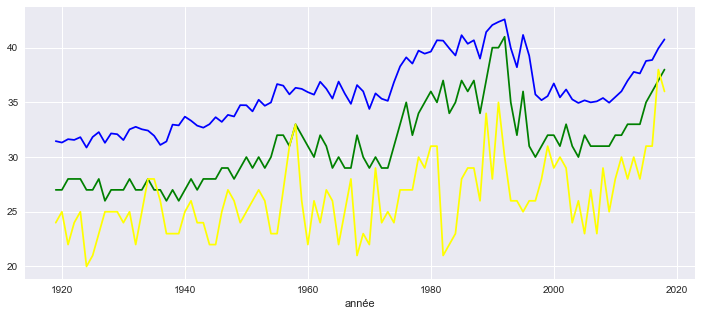

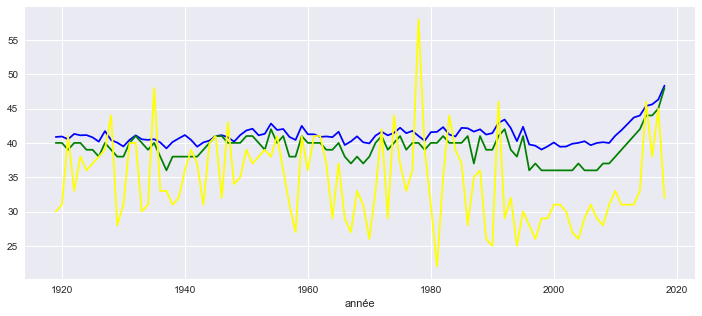

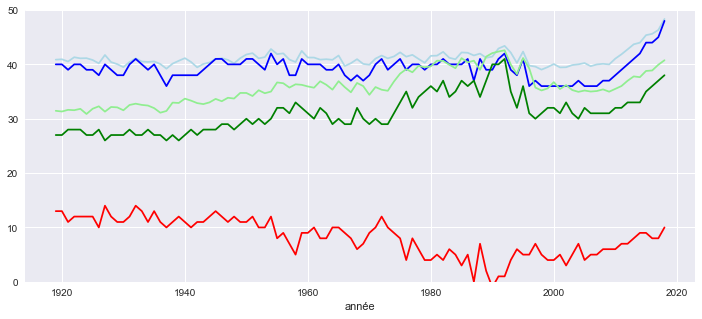

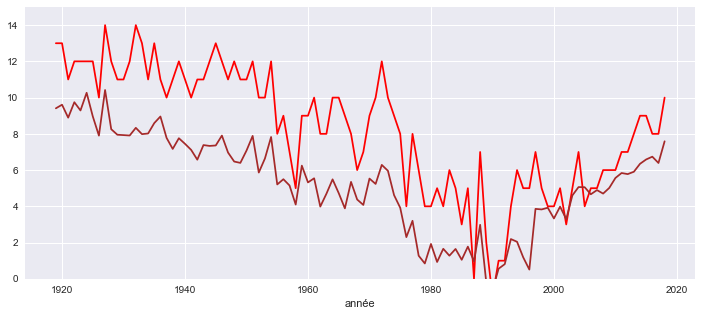

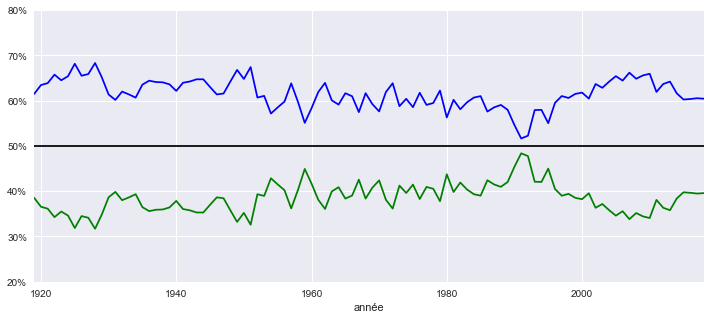

In [19]:
dbf=dbr[dbr['primaryProfession'].str.contains('actress')]
dbh=dbr[dbr['primaryProfession'].str.contains('actor')]

dbf=dbf[dbf.region=='US']
dbh=dbh[dbh.region=='US']

dict0={}
dict1={}
for i in range(101):
    dict0[i]=0
    dict1[i]=0

jf=dbf[dbf.startYear == 1919]
jf=jf['age'].value_counts(ascending=True)
dict0.update(dict(jf))
db=pd.Series(dict0,name=1919)
for i in range(1,100):
    jf=dbf[dbf.startYear == 1919+i]
    jf=jf['age'].value_counts(ascending=True)
    dict0.update(dict(jf))
    db=pd.concat([db,pd.Series(dict0,name=1919+i)],axis=1)
    
    
jh=dbh[dbh.startYear == 1919]
jh=jh['age'].value_counts(ascending=True)
dict1.update(dict(jh))
dh=pd.Series(dict1,name=1919)
for i in range(1,100):
    jh=dbh[dbh.startYear == 1919+i]
    jh=jh['age'].value_counts(ascending=True)
    dict1.update(dict(jh))
    dh=pd.concat([dh,pd.Series(dict1,name=1919+i)],axis=1)
    
    
def stat_series(serie):
    somme=serie.sum()
    moyenne=np.average(serie.index, weights=serie)
    # algo taken here  :https://stackoverflow.com/questions/26102867/python-weighted-median-algorithm-with-pandas
    cumsum = serie.cumsum()
    half = serie.sum() / 2.0
    mediane = serie.index[cumsum >= half][0]
    mode=serie.idxmax()
    return moyenne, mediane, mode, somme

long=len(db.columns)
mmm=np.zeros((long,4))
i=0
for col in db.columns:
    mmm[i,0], mmm[i,1], mmm[i,2], mmm[i,3] = stat_series(db[col])
    i+=1
    
long=len(dh.columns)
hhh=np.zeros((long,4))
i=0
for col in dh.columns:
    hhh[i,0], hhh[i,1], hhh[i,2], hhh[i,3] = stat_series(dh[col])
    i+=1   

mff=pd.DataFrame(data=mmm,index=np.arange(1919,2019),columns=['moyenne','mediane','modus','somme'])
mff.index.name='année'
#mff.describe()

mhh=pd.DataFrame(data=hhh,index=np.arange(1919,2019),columns=['moyenne','mediane','modus','somme'])
mhh.index.name='année'
#mhh.describe()
 
plt.close()
plt.figure(figsize=(12,5))
mff.moyenne.plot(color='blue')
mff.mediane.plot(color='green')
mff.modus.plot(color='yellow')    


plt.figure(figsize=(12,5))
mhh.moyenne.plot(color='blue')
mhh.mediane.plot(color='green')
mhh.modus.plot(color='yellow')   


diff=mhh.mediane-mff.mediane

plt.figure(figsize=(12,5))
mhh.moyenne.plot(color='lightblue',ylim=[0,50])
mhh.mediane.plot(color='blue')
mff.moyenne.plot(color='lightgreen')
mff.mediane.plot(color='green')
diff.plot(color='red')


plt.figure(figsize=(12,5))
diff=mhh.mediane-mff.mediane
diff1=mhh.moyenne-mff.moyenne
diff.plot(color='red',ylim=[0,15])
diff1.plot(color='brown')

qh=mhh.somme/(mhh.somme+mff.somme)
qf=mff.somme/(mhh.somme+mff.somme)
q1=0.5*qh/qh

plt.figure(figsize=(12,5))

ax=qh.plot(color='blue',xlim=[1919,2018],ylim=[0.2,0.8])
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])

qf.plot(color='green') 
q1.plot(color='black')


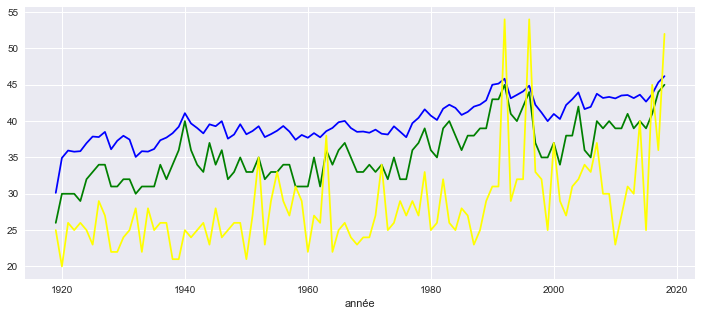

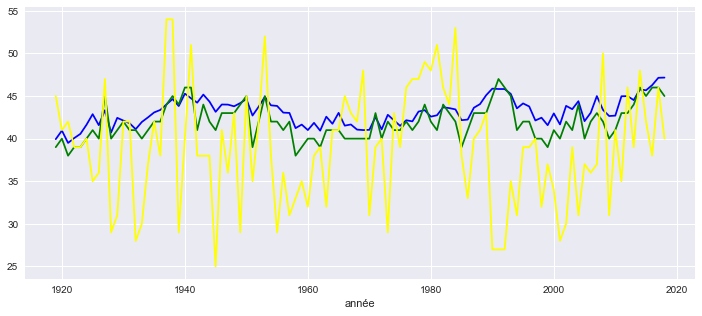

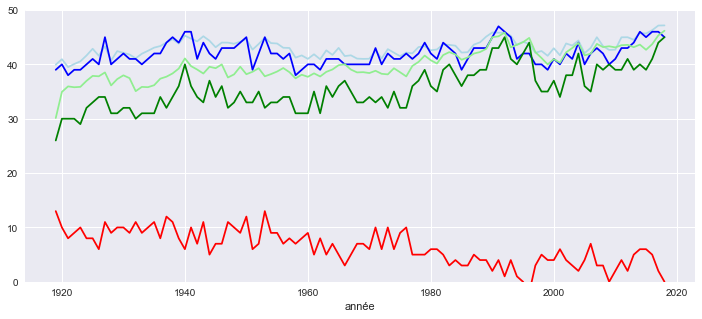

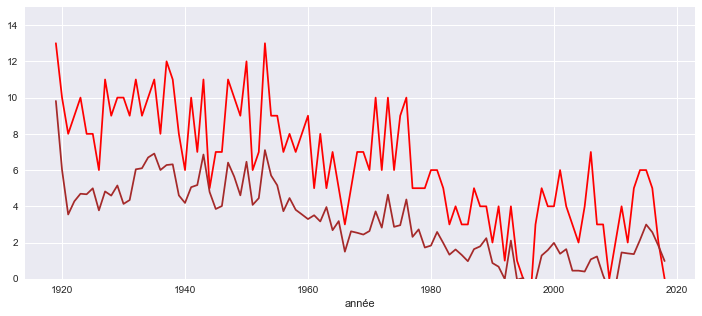

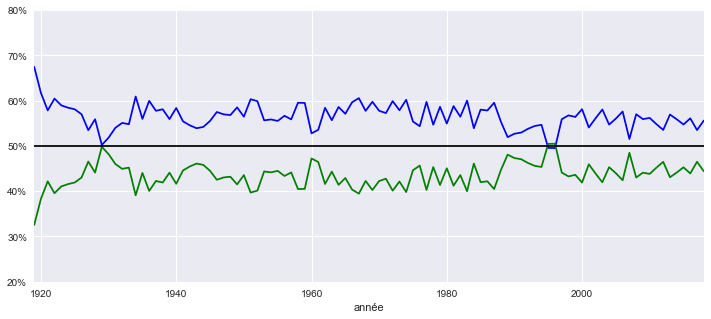

In [20]:
dbf=dbr[dbr['primaryProfession'].str.contains('actress')]
dbh=dbr[dbr['primaryProfession'].str.contains('actor')]
dbf=dbf[dbf.region=='FR']
dbh=dbh[dbh.region=='FR']

dict0={}
dict1={}
for i in range(101):
    dict0[i]=0
    dict1[i]=0

jf=dbf[dbf.startYear == 1919]
jf=jf['age'].value_counts(ascending=True)
dict0.update(dict(jf))
db=pd.Series(dict0,name=1919)
for i in range(1,100):
    jf=dbf[dbf.startYear == 1919+i]
    jf=jf['age'].value_counts(ascending=True)
    dict0.update(dict(jf))
    db=pd.concat([db,pd.Series(dict0,name=1919+i)],axis=1)
    
    
jh=dbh[dbh.startYear == 1919]
jh=jh['age'].value_counts(ascending=True)
dict1.update(dict(jh))
dh=pd.Series(dict1,name=1919)
for i in range(1,100):
    jh=dbh[dbh.startYear == 1919+i]
    jh=jh['age'].value_counts(ascending=True)
    dict1.update(dict(jh))
    dh=pd.concat([dh,pd.Series(dict1,name=1919+i)],axis=1)
    
long=len(db.columns)
mmm=np.zeros((long,4))
i=0
for col in db.columns:
    mmm[i,0], mmm[i,1], mmm[i,2], mmm[i,3] = stat_series(db[col])
    i+=1
    
long=len(dh.columns)
hhh=np.zeros((long,4))
i=0
for col in dh.columns:
    hhh[i,0], hhh[i,1], hhh[i,2], hhh[i,3] = stat_series(dh[col])
    i+=1   

mff=pd.DataFrame(data=mmm,index=np.arange(1919,2019),columns=['moyenne','mediane','modus','somme'])
mff.index.name='année'
#mff.describe()

mhh=pd.DataFrame(data=hhh,index=np.arange(1919,2019),columns=['moyenne','mediane','modus','somme'])
mhh.index.name='année'
#mhh.describe()
 
plt.close()
plt.figure(figsize=(12,5))
mff.moyenne.plot(color='blue')
mff.mediane.plot(color='green')
mff.modus.plot(color='yellow')    


plt.figure(figsize=(12,5))
mhh.moyenne.plot(color='blue')
mhh.mediane.plot(color='green')
mhh.modus.plot(color='yellow')   


diff=mhh.mediane-mff.mediane

plt.figure(figsize=(12,5))
mhh.moyenne.plot(color='lightblue',ylim=[0,50])
mhh.mediane.plot(color='blue')
mff.moyenne.plot(color='lightgreen')
mff.mediane.plot(color='green')
diff.plot(color='red')


plt.figure(figsize=(12,5))
diff=mhh.mediane-mff.mediane
diff1=mhh.moyenne-mff.moyenne
diff.plot(color='red',ylim=[0,15])
diff1.plot(color='brown')

qh=mhh.somme/(mhh.somme+mff.somme)
qf=mff.somme/(mhh.somme+mff.somme)
q1=0.5*qh/qh

plt.figure(figsize=(12,5))

ax=qh.plot(color='blue',xlim=[1919,2018],ylim=[0.2,0.8])
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])

qf.plot(color='green') 
q1.plot(color='black')
